# HW#1 - Yasemin Aylin Akturk

# Task 1 – Curse of dimensionality and effect of sample size
1) For D from 1 to 15 dimensions, simulate 1000 random D-dimensional points, where the value in each dimension is uniformly randomly distributed between -1 and +1. 

In [50]:
#202080200 yasemin aylin akturk hw1

#create data set ----

set.seed(1234567)

dpoint = 1000

dim_1 = runif(dpoint, min = -1 , max = 1)

mydata= data.frame(dim_1)

dim= 15
colno=dim-1

for(i in 1:colno) {                                   
  new <- runif(dpoint, min = -1 , max = 1)                      # Create new column
  mydata[ , ncol(mydata) + 1] <- new                       # Append new column
  colnames(mydata)[ncol(mydata)] <- paste0("dim_", i+1)    # Rename column name
}


#show sample data
mydata[1:3,1:15]

dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,dim_11,dim_12,dim_13,dim_14,dim_15
0.1245217,-0.7860238,-0.3015126,-0.0834061,0.13784409,-0.3157400,0.5821234,-0.2431839,0.97477643,-0.668862102,0.08671117,-0.6613439,-0.8358133,-0.75450333,0.1260009
0.4529970,0.6253928,-0.3102482,0.2456927,-0.07681216,0.5077997,-0.1093272,-0.9929178,-0.09378855,-0.007308658,-0.57080948,-0.7570148,0.5461489,-0.02384876,0.1824879
0.8304997,-0.9810390,-0.3448821,-0.8116864,0.19510489,0.8892982,-0.7272711,0.7489825,-0.74363835,-0.755003393,0.16715738,0.3185737,0.1010671,0.45760960,-0.9134306


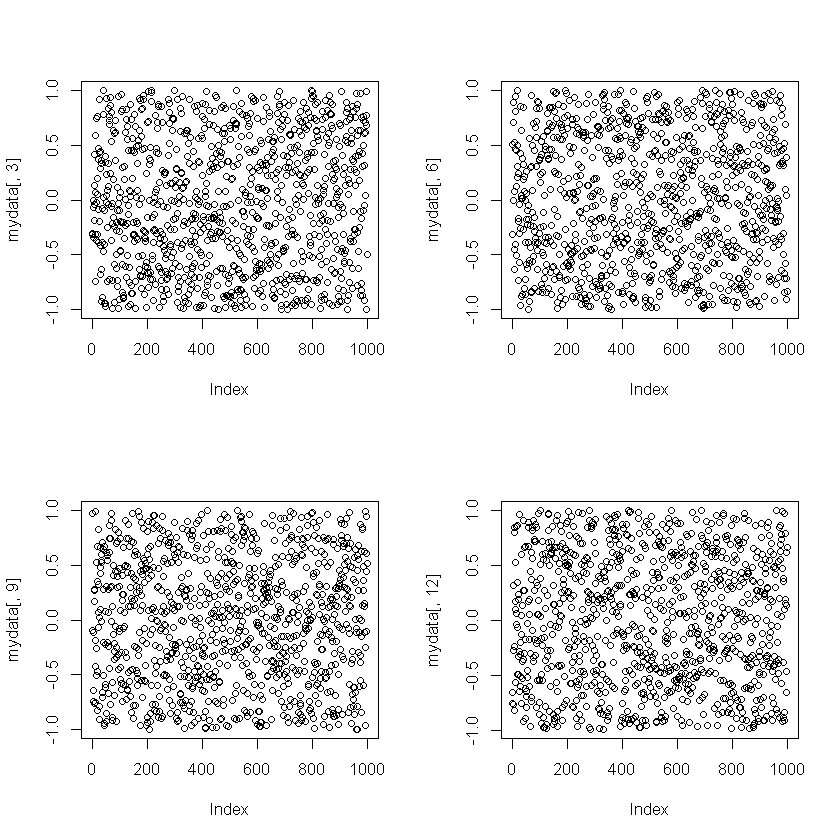

In [53]:
#plot some of the rows to see the distribution----
#uniformly distributed indeed


par(mfrow=c(2,2))

plot(mydata[,3])
plot(mydata[,6])
plot(mydata[,9])
plot(mydata[,12])



1a) Calculate the fraction of these points that are within distance 1 of the origin, giving an
approximation of the volume of the unit hypersphere to the hypercube inscribing it. Plot this fraction as
a function of D (a scatter plot of D versus the fraction). 

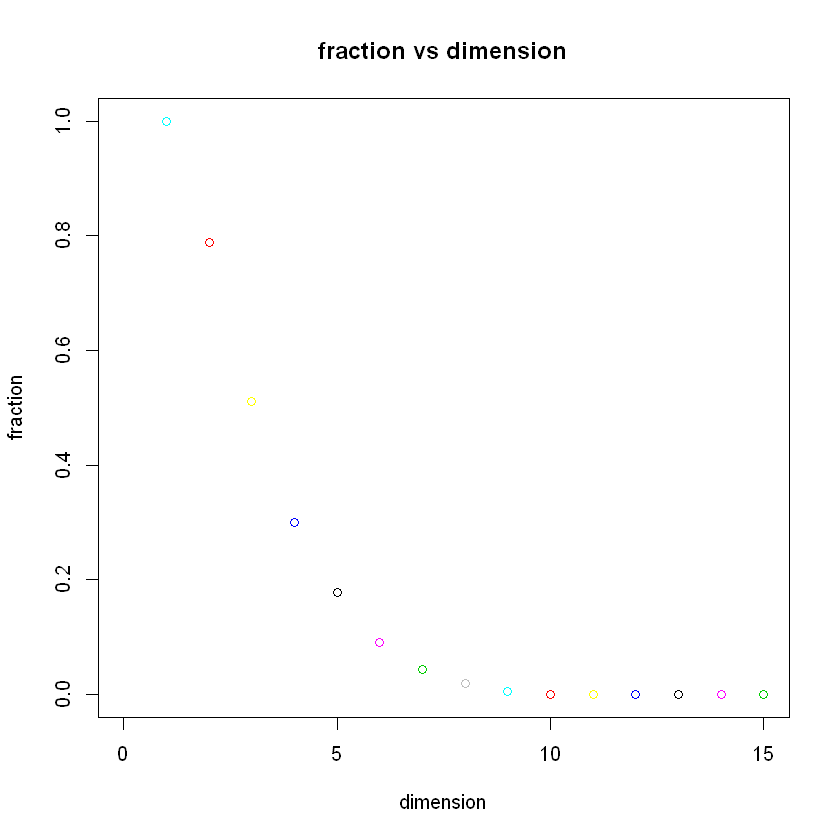

In [54]:

#calculate Eucl. distance to origin----

#create empty plot
plot(0,0,ylim= c(0,1),xlim= c(0,15),col="white",main= "fraction vs dimension", xlab = "dimension", ylab = "fraction" )

for (spcdim in 1:15 ) {
  
origin <- rep(0, spcdim)

origin

#calculate distance bw points and org

distlist <- c()

dist= 0

for (i in 1: dpoint) {

for (j in 1:spcdim) {


  dist = dist + (mydata[i,j]-origin[j])^2
  

} #end j
  
  distlist <- append(distlist, sqrt(dist))
  dist=0

} #end i


#how many are within distance 1?

counter=0
for (i in 1:dpoint) 
  {
  if (distlist[i] <= 1) { counter = counter +1}
  fraction = counter/ dpoint
 
}

#keep fractions for 2d and 3d
if (spcdim==2) {fraction2d = fraction}
if (spcdim==3) {fraction3d = fraction}


#add poinsts
points(spcdim,fraction,col= 5*spcdim)

} #end spcdim


As the dimension increases the fraction gets lower.  When dimension (d) increases, data becomes sparse in the space and consqeuntly the fraction gets smaller. In higher dimensions (after d=8-9..) the fraction values gets indiscriminable. 

1b) Use the value of this fraction at D = 2 and D = 3 to get estimates for the value of pi (Π) as you know
the area (for D = 2) and volume (for D = 3) formulae for these cases. 

In [55]:
#estimate pi for 2d and 3d----

#n/N = fraction2d = circle area / 2by2 square area =  pi.r^2 / (2*2) where r=1  

# pi estimate =   fraction2d * 4

pi2d = fraction2d * 4
pi2d
 
#n/N = fraction3d = sphere volume / 2by2by2 cube volume area = 4/3 * pi.r^2 / (2*2*2)  where r=1

# pi estimate =   fraction3d * 6

pi3d = fraction3d * 6
pi3d

[1] 3.156

[1] 3.072

Estimated pi in 2d  is 3.156 and in 3d is 3.072. (for this randomseed)

1c) Perform the calculations in part (b) with larger sample sizes. You can use the following set: {5000,
10000, 25000, 50000, 100000}. Visualize the estimated Π for D = 2 and D = 3 cases. 

In [56]:
#########larger data----
#create a  data set ----

pilist2 <- c()
pilist3 <- c()
datapoint <-   c(1000,5000,10000,25000,50000,100000)

for (dpoint in   c(1000,5000,10000,25000,50000,100000)) {

dim_1 = runif(dpoint, min = -1 , max = 1)

mydata= data.frame(dim_1)

dim =3

for(i in 1:3) {                                   
  new <- runif(dpoint, min = -1 , max = 1)                      
  mydata[ , ncol(mydata) + 1] <- new                      
  colnames(mydata)[ncol(mydata)] <- paste0("dim_", i+1)    
              }



#calculate Eucl. distance to origin----



for (spcdim in 1:3) {
  
  
  origin <- rep(0, spcdim)
  

  #calculate distance bw points and org
  
  distlist <- c()
  
  dist= 0
  
  for (i in 1: dpoint) 
    
  {
    
    for (j in 1:spcdim)
      
    {
     
    dist = dist + (mydata[i,j]-origin[j])^2
      
    } #end j
    
  distlist <- append(distlist, sqrt(dist))
  dist=0
    
  } #end i
  
  
  #how many within 1?
  
  counter=0
  for (i in 1:dpoint) 
  {
  if (distlist[i] <= 1) { counter = counter +1}
  fraction = counter/ dpoint
    
  }
  
  #keep fractions for 2d and 3d
  
 
  
  if (spcdim==2)
    
  {fraction2d = fraction
  
  
  #estimate pi for 2d and 3d----
  
  #n/N = fraction2d = circle area / 2by2 square area =  pi.r^2 / (2*2) where r=1  
  
  # pi estimate =   fraction2d * 4
  
  pi2d = fraction2d * 4
  
  
  
  pilist2 <- append(pilist2 , pi2d )
  
    }
  
  
  if (spcdim==3) 
    
   {fraction3d = fraction

  
  #n/N = fraction3d = sphere volume / 2by2by2 cube volume area = 4/3 * pi.r^2 / (2*2*2)  where r=1
  
  # pi estimate =   fraction3d * 6
  
  pi3d = fraction3d * 6
  
  pilist3 <- append(pilist3 , pi3d )
  
  }
  
 
} #end spcdim



} #end dpoint



[1] 3.16000 3.14000 3.14280 3.13984 3.14392 3.14244

[1] 3.28200 3.10920 3.12960 3.12864 3.13368 3.14160

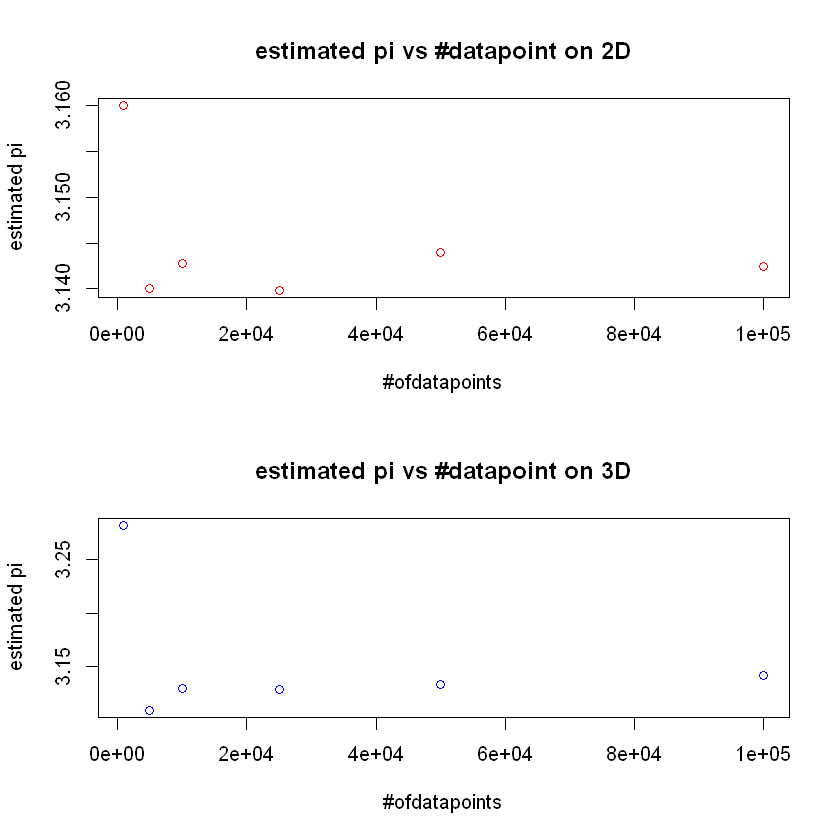

In [57]:
########show pi estimates and plot them----
pilist2
pilist3

par(mfrow=c(2,1))

plot(datapoint,pilist2, xlim=c(1000,100000), ylab = "estimated pi",xlab = "#ofdatapoints", main ="estimated pi vs #datapoint on 2D" , col = "red")

plot(datapoint,pilist3, xlim=c(1000,100000), ylab = "estimated pi", xlab = "#ofdatapoints", main ="estimated pi vs #datapoint on 3D", col= "blue")


In larger data sets the pi estimates get closer to the real pi value. However, even in comperatively smaller data sets the estimated value can be sufficiently good.

1d) Repeat this simulation, sampling 1000 D-dimensional points from 1 to 15 dimensions, where the
value in each dimension is uniformly randomly distributed between -1 and +1. For each value of D,
generate an additional 100 test instances and calculate the distance to each test instance’s nearest
neighbor. Plot the average distance from the test instances to their nearest neighbors as a function of D.

In [58]:
############nearest point----
#create a data set
dpoint = 1000 #datapoint
tpoint = 100   #test

dim_1 = runif(dpoint, min = -1 , max = 1)
dimt_1 = runif(tpoint, min = -1 , max = 1)

myfulldata= data.frame(dim_1)
testdata =data.frame(dimt_1)

dim= 15
colno=dim-1

#create 1000x15 dataframe
for(i in 1:colno) {                                   
  new <- runif(dpoint, min = -1 , max = 1)                      
  myfulldata[ , ncol(myfulldata) + 1] <- new                       
  colnames(myfulldata)[ncol(myfulldata)] <- paste0("dim_", i+1)    
  }

#create 100x15 test data
for(i in 1:colno) {                                   
  newtest <- runif(tpoint, min = -1 , max = 1)                    
  testdata[ , ncol(testdata) + 1] <- newtest                      
  colnames(testdata)[ncol(testdata)] <- paste0("dimt_", i+1)     
}

#show data
myfulldata[1:3,1:15]
testdata[1:3,1:15]


dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,dim_11,dim_12,dim_13,dim_14,dim_15
-0.8958017,0.1240292,0.37273203,-0.7679584,0.7730939,0.8608576,0.5967450,-0.2946164,-0.5221827,0.6975272,-0.5436698,-0.5002466,0.4113353,0.2568320,-0.6106018
-0.5686269,-0.1057367,0.51348430,0.7723326,0.5333276,-0.7340572,0.2832075,0.2181264,0.7742231,-0.1854482,-0.5780836,0.6143407,0.9610777,-0.6971320,0.7664135
-0.2579594,0.9821239,-0.06481593,-0.5573826,0.4809229,0.3069279,0.4504636,0.1292400,-0.9922668,0.1163237,-0.8565392,0.9482171,0.4421046,-0.1414256,-0.6839966


dimt_1,dimt_2,dimt_3,dimt_4,dimt_5,dimt_6,dimt_7,dimt_8,dimt_9,dimt_10,dimt_11,dimt_12,dimt_13,dimt_14,dimt_15
0.9367799,-0.580765829,0.02888207,0.6996972,-0.8219288,-0.5519304,0.96359871,-0.7251423,0.2404418,0.04575498,-0.9137810,0.9165532,-0.1524107,-0.36852649,0.13491630
-0.7140505,0.328396133,-0.40481865,0.8406821,-0.2469374,0.4156208,-0.96584502,-0.5029078,0.4851318,-0.48964702,0.7353443,0.6602449,0.7086776,-0.04579532,0.07762436
0.9260252,0.002849768,0.39230690,-0.5807550,-0.6732463,0.9590643,0.01808689,-0.9216936,0.1428854,-0.88591706,-0.9284214,-0.8977383,0.1376096,-0.95854741,0.42933698


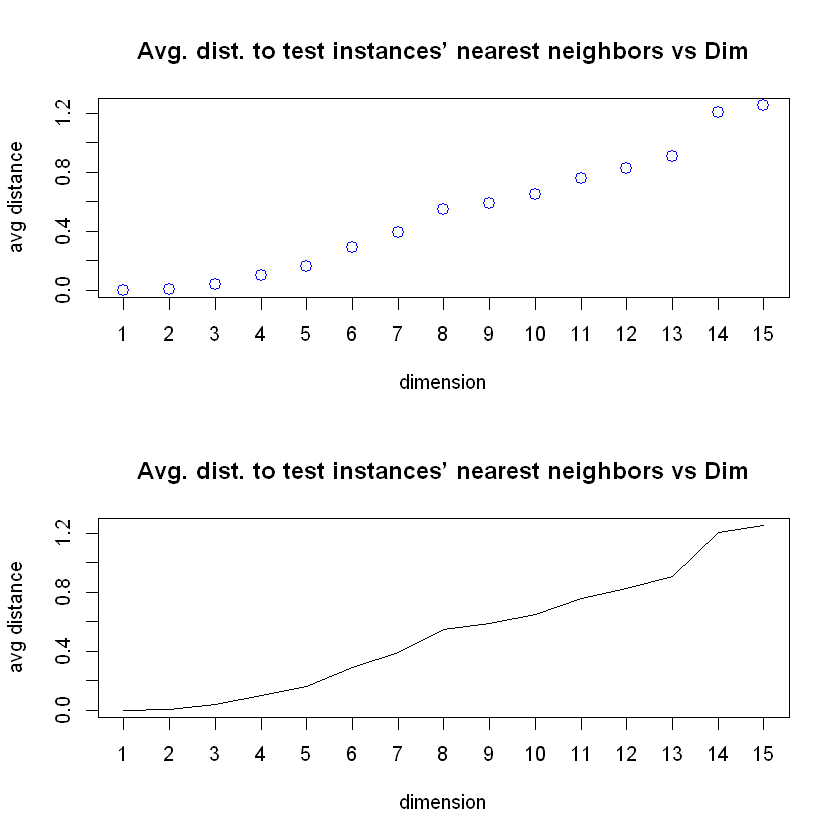

In [59]:

#calculate Eucl. distance by points and find min----


#calculate distance bw points and test instance
  
 
  avelist <- c()
  
  dist= 0
  
 
  
for (spcdim in 1:15) {
  
  distlist <- c()
  mindistlist <-c()
  
  for (t in 1: tpoint)  #for each test point
    
  {
    
  for (i in 1: dpoint) 
    
  {
    
    for (j in 1:spcdim)
      
    {
      
      dist = dist + (myfulldata[i,j]-testdata[t,j])^2
      
    } #end j
    
    distlist <- append(distlist, sqrt(dist))  # list of distances form one test instance to all the data (list size 1000)
    dist=0
    minofdist = min(distlist) #min of distances for that test point, test instances nearest neighbor distance
    
    
  } #end i
  
    mindistlist <- append(mindistlist, minofdist)
 
} #end t points
  
  avelist <- append(avelist, mean(mindistlist))
  
#avg. of the test points' nearest neighbor distance 
#avelist holds this info for each dimension (D)
  

} #end for each dim

par(mfrow=c(2,1))
plot (c(1:15),avelist,xlim=c(1,15),main= "Avg. dist. to test instances’ nearest neighbors vs Dim", xlab = "dimension", ylab = "avg distance",cex = 1.3,col='blue')
axis(1, seq(1,15,1))

plot (c(1:15),avelist,xlim=c(1,15),main= "Avg. dist. to test instances’ nearest neighbors vs Dim", xlab = "dimension", ylab = "avg distance" ,type="l")
axis(1, seq(1,15,1))


#avelist #show the avg distances

 When dimension (d) increases, data becomes sparse in the space. Conseqeuntly even the nearest neighbor gets further away.

# Task 2 – Practicing data manipulation skills on images 
2)Read image as a variable in R. You need to install “jpeg” package to read image into a
variable if you use R. What is the structure of the variable that stores the image? What is the dimension?

In [ ]:
install.packages('jpeg')
library(jpeg)


In [60]:
#I used a local file. This path needs to be updated if wanted to re-run.
klasor =  "C:/Users/y.akturk/Documents/"
setwd(klasor)
img <- readJPEG("ya.jpg")

#class of image 
#structure of image
class(img)  
str(img)

[1] "array"

 num [1:512, 1:512, 1:3] 0.678 0.678 0.678 0.678 0.678 ...


It is kept in an array. It has 512x512 rowsxcols and 3 layers.

In [61]:
#dimension 

dim(img)   
N=NCOL(img)
M=NROW(img)
N  #col no
M  #row no

[1] 512 512   3

[1] 512

[1] 512

There are 3 layers: they correspond to R, G and B values. In each layer, each cell is a pixel.

In [8]:
#sample of the format
img[35:37,50:52,1]
img[35:37,50:52,2]
img[35:37,50:52,3]

0.6823529,0.6823529,0.6823529
0.6823529,0.6823529,0.6823529
0.6823529,0.6823529,0.6823529


0.6941176,0.6941176,0.6941176
0.6941176,0.6941176,0.6941176
0.6941176,0.6941176,0.6941176


0.6588235,0.6588235,0.6588235
0.6588235,0.6588235,0.6588235
0.6588235,0.6588235,0.6588235


2a) Display the image. 
2b) Display each channel as separate image

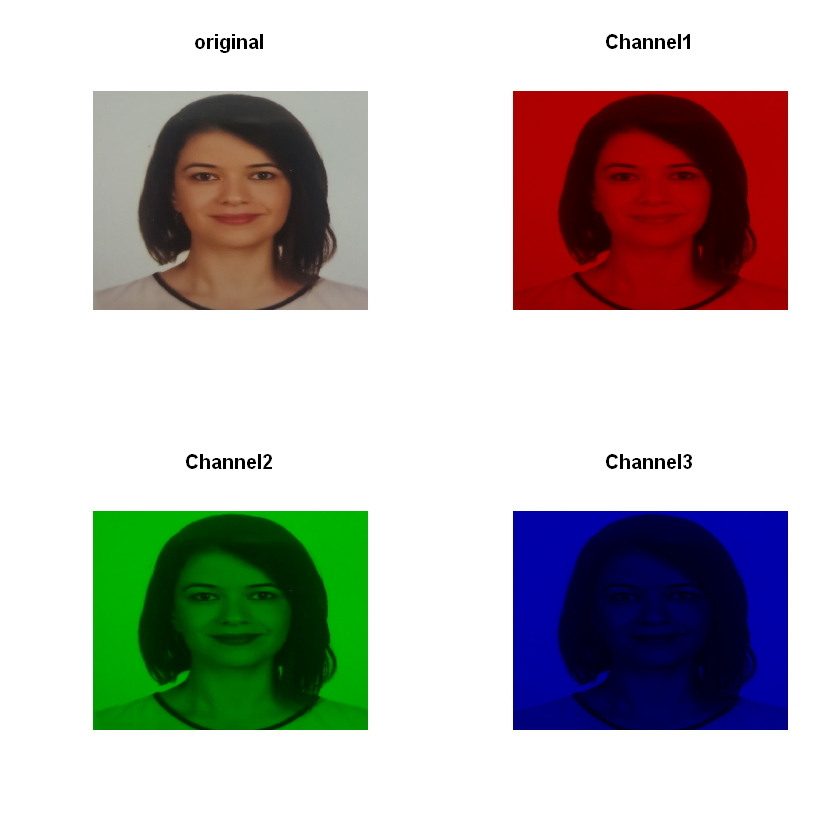

In [9]:
#plot with rasterimage ----
par(mfrow=c(2,2))

plot(0:1,0:1,type="n",axes=FALSE,xlab='',ylab='', main="original")
rasterImage(img,0,0,1,1)

redme <- img
redme[1:M,1:N,2] = 0
redme[1:M,1:N,3] = 0
plot(0:1,0:1,type="n",axes=FALSE,xlab='',ylab='', main="Channel1")
rasterImage(redme,0,0,1,1)

blueme <- img
blueme[1:M,1:N,1] = 0
blueme[1:M,1:N,3] = 0
plot(0:1,0:1,type="n",axes=FALSE,xlab='',ylab='', main="Channel2")
rasterImage(blueme,0,0,1,1)

greenme <- img
greenme[1:M,1:N,1] = 0
greenme[1:M,1:N,2] = 0
plot(0:1,0:1,type="n",axes=FALSE,xlab='',ylab='', main="Channel3")
rasterImage(greenme,0,0,1,1)



In [ ]:
#do the same with a package,just for trial
install.packages('imager')
library(imager)

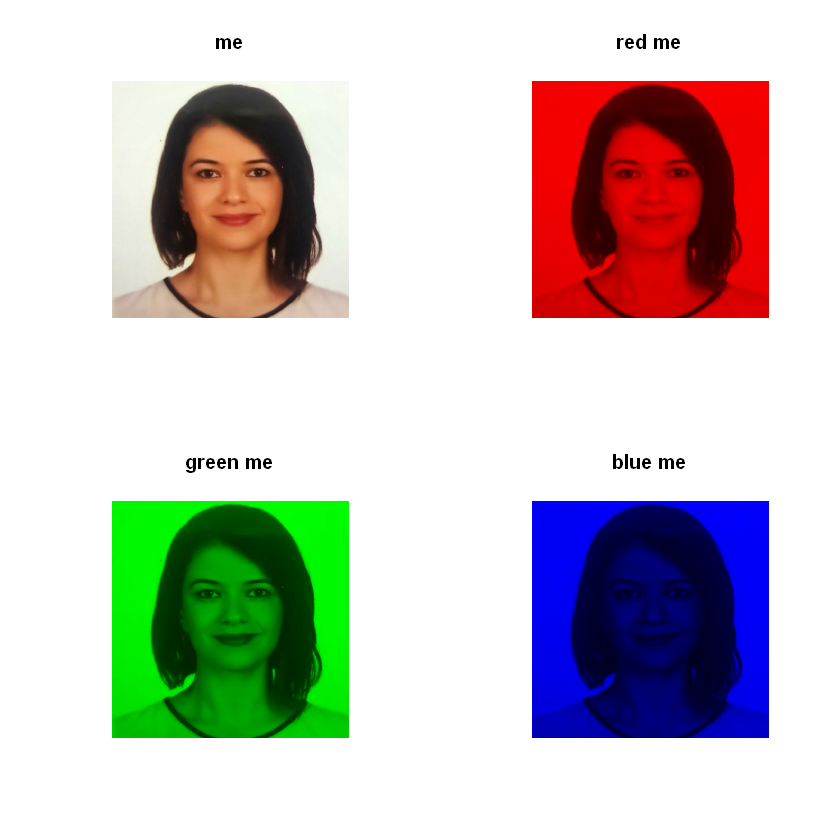

In [12]:
#plot red, blue, green images with imager----

par(mfrow=c(2,2))

me <- load.image("ya.jpg")
plot(me,axes=FALSE,main = "me")


me_red <- load.image("ya.jpg")

#channel(me_red,1) 
channel(me_red,2) <- 0
channel(me_red,3) <- 0

plot(me_red,axes=FALSE,main = "red me")


me_green <- load.image("ya.jpg")

channel(me_green,1) <-  0
#channel(me_green,2)
channel(me_green,3) <- 0

plot(me_green,axes=FALSE, main = "green me")


me_blue <- load.image("ya.jpg")

channel(me_blue,1) <-  0
channel(me_blue,2) <-  0
#channel(me_blue,3) 

plot(me_blue,axes=FALSE,main = "blue me")


2c) For each channel, take the average of the columns and plot the average as a line plot for each
channel on a single plot. 

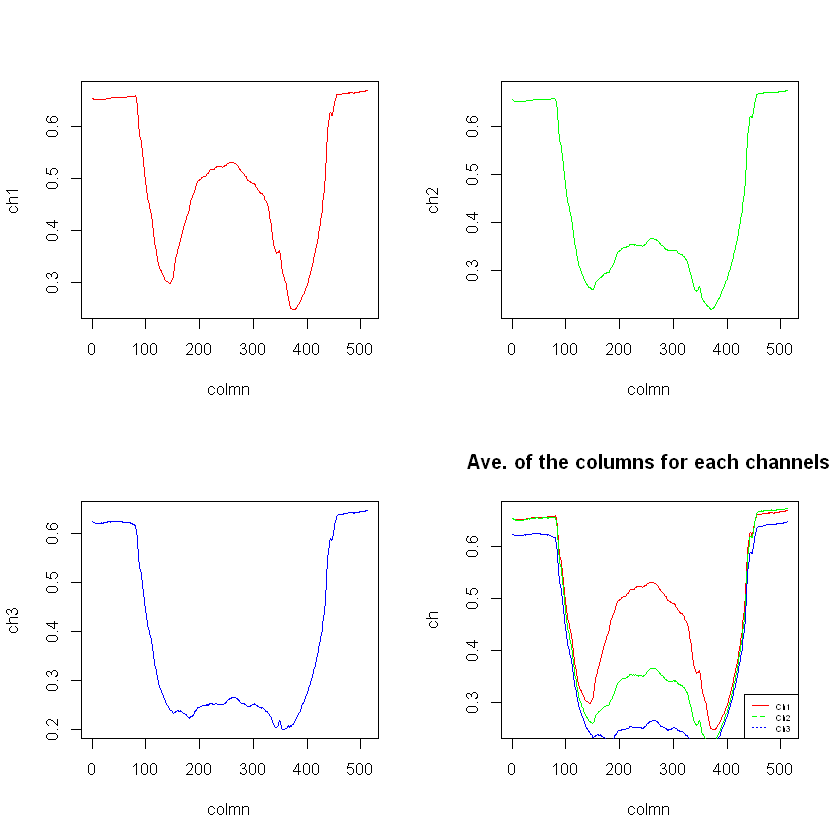

In [62]:
img <- readJPEG("ya.jpg")


ch1 <- list(colMeans(img[,,1]))
ch2 <- list(colMeans(img[,,2]))
ch3 <- list(colMeans(img[,,3]))

par(mfrow=c(2,2))
colmn <- c(1:512)
plot(colmn,ch1[[1]], col= "red", type ="l", ylab= "ch1")
plot(colmn,ch2[[1]], col= "green", type ="l" , ylab= "ch2")
plot (colmn,ch3[[1]], col= "blue", type ="l", ylab= "ch3")


plot(colmn,ch1[[1]], col= "red", type ="l", ylab= "ch", main= "Ave. of the columns for each channels")
legend(text.font=0.5,cex= 0.5,"bottomright", legend=c("Ch1", "Ch2","Ch3" ), lty= 1:3, col=c("red","green", "blue"))
points(colmn,ch2[[1]], col= "green", type ="l")
points (colmn,ch3[[1]], col= "blue",type ="l")

2d) For each channel, subtract one half of the image from the other half. If you observe negative pixel
values, you can make them equal to zero. Then:
• Display the new image.


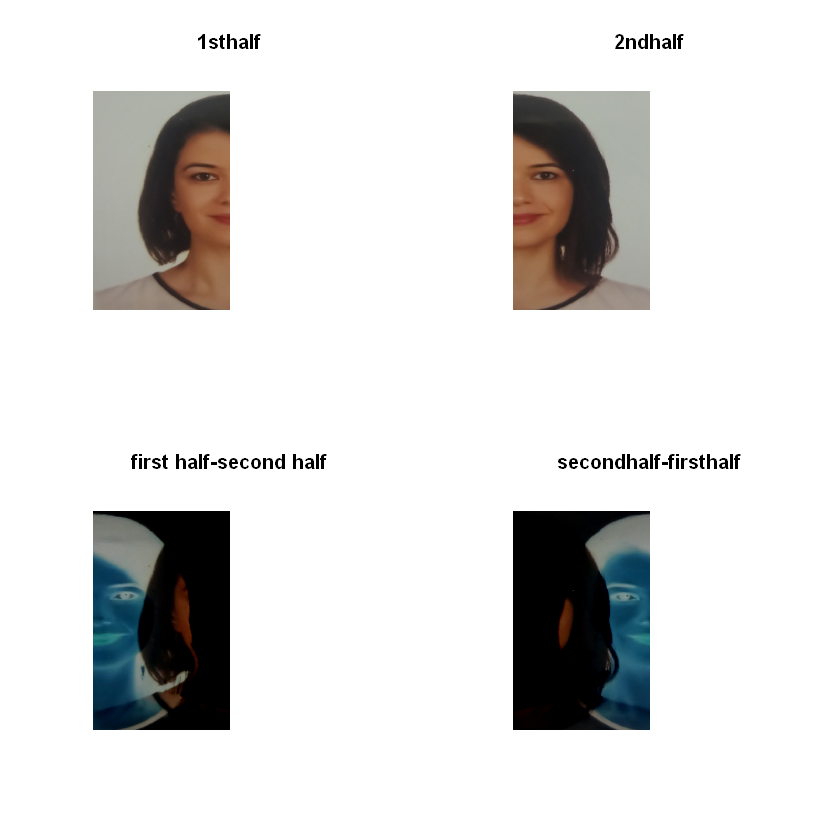

In [63]:
#subtract one half of the image from the other half ----

img <- readJPEG("ya.jpg")

Nnew= N/2

par(mfrow=c(2,2))

sep1= img[1:M,1:Nnew,]
plot(0:1,0:1,type="n",axes=FALSE, xlab='',ylab='',main="1sthalf")
rasterImage(sep1,0,0,0.5,1)


sep2=  img[1:M,(Nnew+1):N,]
plot(0:1,0:1,type="n",axes=FALSE, xlab='',ylab='',main="2ndhalf")
rasterImage(sep2,0,0,0.5,1)

#first half-second half
newimg = img[1:M,1:Nnew,] - img[1:M,(Nnew+1):N,]


for (c in 1:3 )
{
for (i in 1:M) 
  
{
  for (j in 1:Nnew)
  {
    
    if ( newimg [i,j,c] < 0) 
    {
      newimg [i,j,c] = 0 
      
    }
    
  }
  
}

} #end c
plot(0:1,0:1,type="n",axes=FALSE,xlab='',ylab='', main="first half-second half")
rasterImage(newimg,0,0,0.5,1)

#secondhalf-firsthalf


newimg2 =  img[1:M,(Nnew+1):N,] - img[1:M,1:Nnew,] 

for (c in 1:3 )
{

for (i in 1:M) 
  
{
  for (j in 1:Nnew)
  {
    
    if ( newimg2 [i,j,c] < 0) 
    {
      newimg2 [i,j,c] = 0 
      
    }
    
  }
  
}

} #end c

plot(0:1,0:1,type="n",axes=FALSE, xlab='',ylab='',main="secondhalf-firsthalf")
rasterImage(newimg2,0,0,0.5,1)



2d)Display each channel separately as separate image.

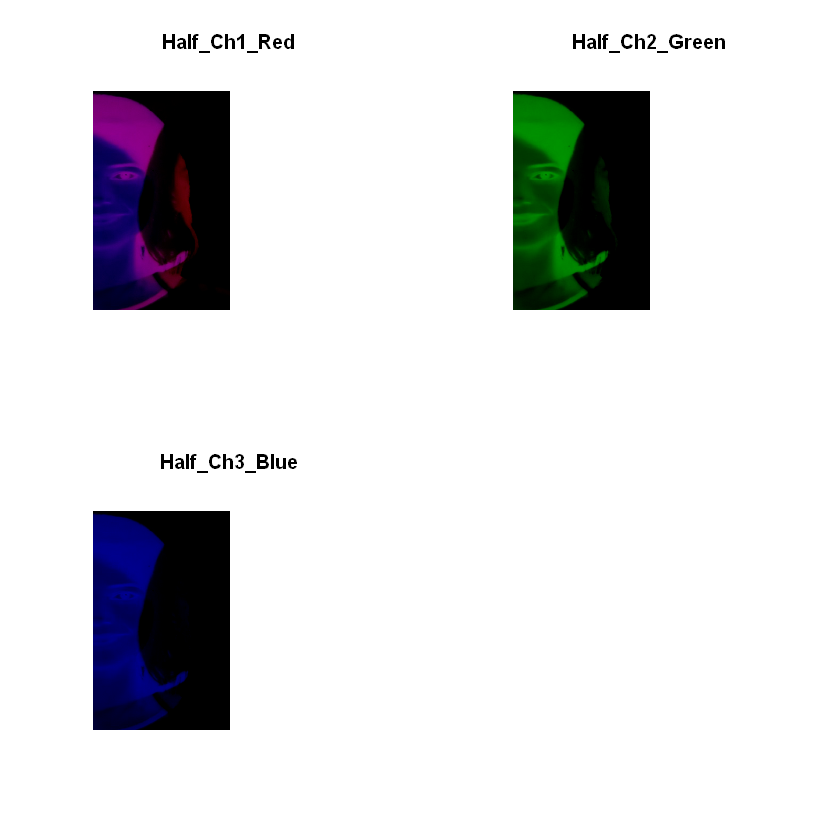

In [64]:

# Plot images in each channel

par(mfrow=c(2,2))

newredme <- newimg
newredme[1:M,1:Nnew,2] = 0
redme[1:M,1:Nnew,3] = 0
plot(0:1,0:1,type="n",axes=FALSE,xlab='',ylab='', main="Half_Ch1_Red")
rasterImage(newredme,0,0,0.5,1)

newblueme <- newimg
newblueme[1:M,1:Nnew,1] = 0
newblueme[1:M,1:Nnew,3] = 0
plot(0:1,0:1,type="n",axes=FALSE, xlab='',ylab='',main="Half_Ch2_Green")
rasterImage(newblueme,0,0,0.5,1)

newgreenme <- newimg
newgreenme[1:M,1:Nnew,1] = 0
newgreenme[1:M,1:Nnew,2] = 0
plot(0:1,0:1,type="n",axes=FALSE, xlab='',ylab='',main="Half_Ch3_Blue")
rasterImage(newgreenme,0,0,0.5,1)



2e) In order to create a noisy image, add a random noise from uniform distribution with minimum value
of 0 and a maximum value of “0.1 * maximum pixel value observed” to each pixel value for each
channel of original image.
• Display the new image.



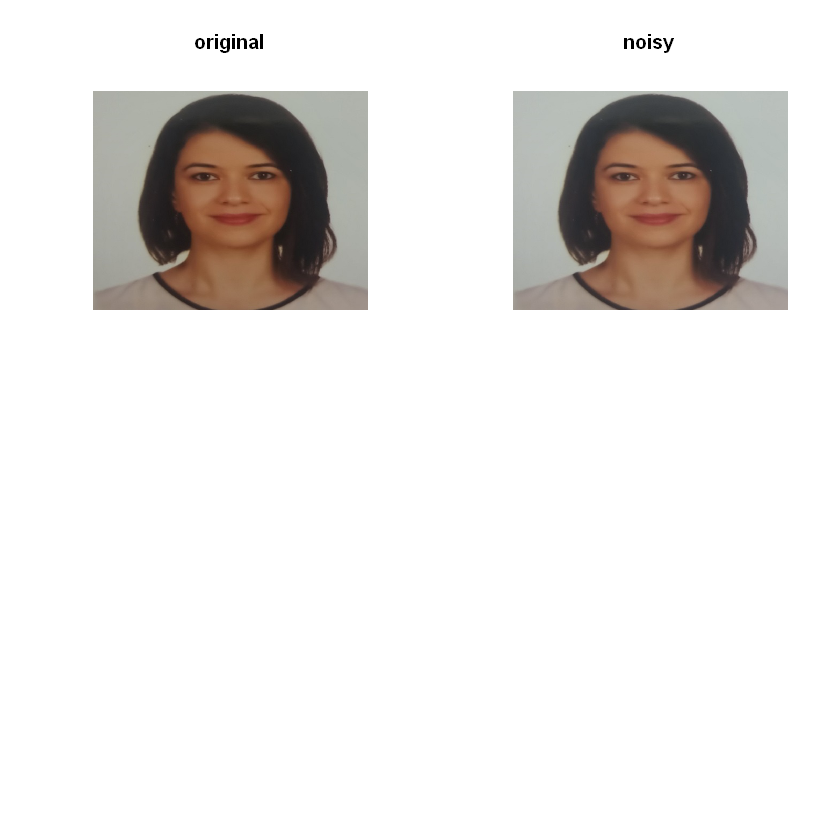

In [65]:
#add noise
set.seed(1234567)

img <- readJPEG("ya.jpg")
par(mfrow=c(2,2))

plot(0:1,0:1,type="n",axes=FALSE,xlab='',ylab='', main="original")
rasterImage(img,0,0,1,1)

#min of each channel
N= dim(img)[1]
M=  dim(img)[2]


M1=max(img[,,1])
M2= max(img[,,2])
M3= max(img[,,3])

noisyimg <- img

noisyimg[,,1] <-  img[,,1] + runif(1,0, 0.1* M1) 
noisyimg[,,2] <-  img[,,2] + runif(1,0, 0.1* M2) 
noisyimg[,,3] <-  img[,,3] + runif(1,0, 0.1* M3) 


plot(0:1,0:1,type="n",axes=FALSE,xlab='',ylab='', main="noisy")
rasterImage(noisyimg,0,0,1,1)

 #It became brighter

2e) Display each channel separately as separate image.

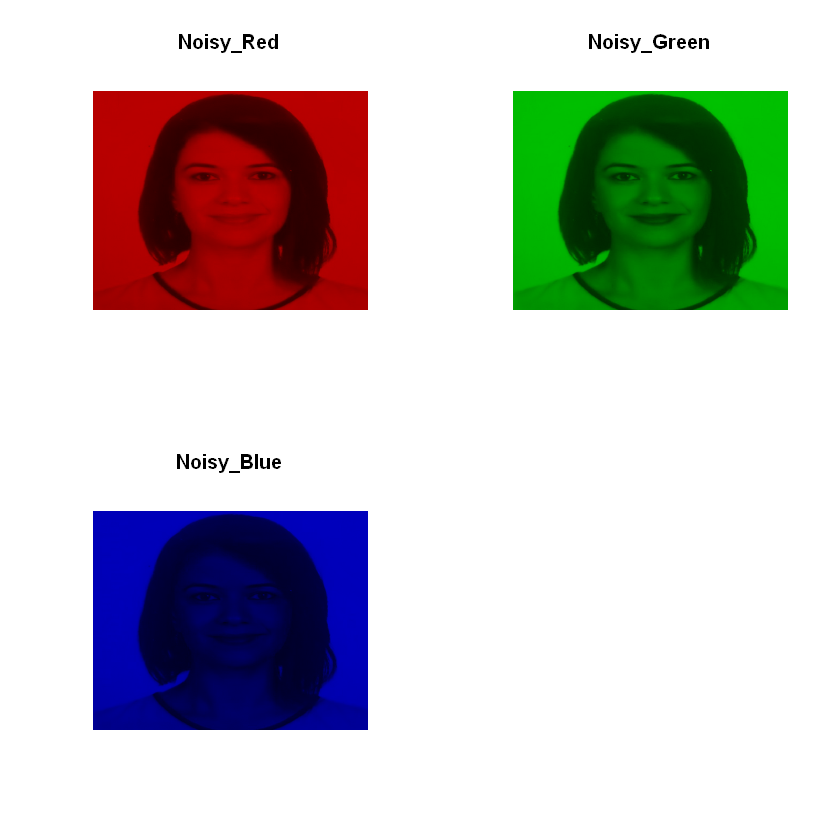

In [66]:
#display in each channel

par(mfrow=c(2,2))

nosiyredme <- noisyimg
nosiyredme[1:M,1:N,2] = 0
nosiyredme[1:M,1:N,3] = 0
plot(0:1,0:1,type="n",axes=FALSE,xlab='',ylab='', main="Noisy_Red")
rasterImage(nosiyredme,0,0,1,1)

nosiyblueme <- noisyimg
nosiyblueme[1:M,1:N,1] = 0
nosiyblueme[1:M,1:N,3] = 0
plot(0:1,0:1,type="n",axes=FALSE, xlab='',ylab='',main="Noisy_Green")
rasterImage(nosiyblueme,0,0,1,1)

nosiygreenme <- noisyimg
nosiygreenme[1:M,1:N,1] = 0
nosiygreenme[1:M,1:N,2] = 0
plot(0:1,0:1,type="n",axes=FALSE, xlab='',ylab='',main="Noisy_Blue")
rasterImage(nosiygreenme,0,0,1,1)
